In [4]:
# Instalação e importação de Bibliotecas
# pip install pandas scikit-learn optuna

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import optuna
import matplotlib.pyplot as plt

In [5]:
# Carregar os dados
df = pd.read_csv("C:/Users/ana_v/OneDrive/Área de Trabalho/GitHub/breastcancer-classification/TCGA Repository/TCGA.csv", low_memory=False)

# Obtém os valores únicos na coluna 'Type'
unique_types = df['Type'].unique()

# Cria um dicionário mapeando cada tipo único para um número
type_to_numeric = {type_name: index for index, type_name in enumerate(unique_types)}

# Aplica a substituição usando o método map
df['Type'] = df['Type'].map(type_to_numeric)

# Armazena a coluna 'Type' para adicioná-la de volta posteriormente
type_column = df['Type']

# Prepara o DataFrame para normalização (remover colunas desnecessárias)
df_num = df.drop(columns=["Sample", "Type"])

# Normalizar os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_num)

# Aplicação do PCA
pca = PCA(n_components=0.8)  
pca.fit(dados_normalizados)
dados_pca = pca.transform(dados_normalizados)

In [6]:
# Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(dados_pca, df['Type'], test_size=0.2, random_state=42)

# Função objetivo para otimização do SVM
def objective_svm(trial):
    svc_c = trial.suggest_loguniform('svc_c', 1e-5, 1e2)
    svc_kernel = trial.suggest_categorical('svc_kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    
    model_svm = SVC(C=svc_c, kernel=svc_kernel, random_state=42)
    score = cross_val_score(model_svm, X_train, y_train, cv=10, scoring='accuracy').mean()
    return score

# Função objetivo para otimização do Random Forest
def objective_rf(trial):
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 50, 200)
    rf_max_depth = trial.suggest_int('rf_max_depth', 10, 50)
    rf_min_samples_split = trial.suggest_int('rf_min_samples_split', 2, 20)
    
    model_rf = RandomForestClassifier(n_estimators=rf_n_estimators, max_depth=rf_max_depth,
                                      min_samples_split=rf_min_samples_split, random_state=42)
    score = cross_val_score(model_rf, X_train, y_train, cv=10, scoring='accuracy').mean()
    return score

# Função objetivo para otimização da Regressão Logística
def objective_lr(trial):
    lr_c = trial.suggest_loguniform('lr_c', 1e-5, 1e2)
    lr_solver = trial.suggest_categorical('lr_solver', ['newton-cg', 'lbfgs', 'liblinear', 'saga'])
    
    model_lr = LogisticRegression(C=lr_c, solver=lr_solver, max_iter=10000, random_state=42)
    score = cross_val_score(model_lr, X_train, y_train, cv=10, scoring='accuracy').mean()
    return score

# Estudo e otimização com Optuna para SVM
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective_svm, n_trials=10)
best_params_svm = study_svm.best_params
print("Melhores parâmetros para SVM:", best_params_svm)

# Estudo e otimização com Optuna para Random Forest
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=10)
best_params_rf = study_rf.best_params
print("Melhores parâmetros para Random Forest:", best_params_rf)

# Estudo e otimização com Optuna para Regressão Logística
study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=10)
best_params_lr = study_lr.best_params
print("Melhores parâmetros para Regressão Logística:", best_params_lr)

[I 2024-07-30 18:59:15,210] A new study created in memory with name: no-name-5c37718c-26e0-48d0-9826-d3763f34a985
C:\Users\ana_v\AppData\Local\Temp\ipykernel_32472\1266489576.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  svc_c = trial.suggest_loguniform('svc_c', 1e-5, 1e2)
[I 2024-07-30 18:59:15,522] Trial 0 finished with value: 0.7527927927927929 and parameters: {'svc_c': 0.0038659164351715937, 'svc_kernel': 'linear'}. Best is trial 0 with value: 0.7527927927927929.
C:\Users\ana_v\AppData\Local\Temp\ipykernel_32472\1266489576.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  svc_c = trial.suggest_loguniform('svc_c', 1e-5, 1e2)
[I 2024-07-30 18:59:15,888] Trial 

Melhores parâmetros para SVM: {'svc_c': 0.6472123239442195, 'svc_kernel': 'sigmoid'}


[I 2024-07-30 18:59:30,325] Trial 0 finished with value: 0.72990990990991 and parameters: {'rf_n_estimators': 133, 'rf_max_depth': 29, 'rf_min_samples_split': 16}. Best is trial 0 with value: 0.72990990990991.
[I 2024-07-30 18:59:47,938] Trial 1 finished with value: 0.7285765765765766 and parameters: {'rf_n_estimators': 191, 'rf_max_depth': 43, 'rf_min_samples_split': 17}. Best is trial 0 with value: 0.72990990990991.
[I 2024-07-30 18:59:54,522] Trial 2 finished with value: 0.7218558558558559 and parameters: {'rf_n_estimators': 71, 'rf_max_depth': 36, 'rf_min_samples_split': 6}. Best is trial 0 with value: 0.72990990990991.
[I 2024-07-30 19:00:00,178] Trial 3 finished with value: 0.7205945945945946 and parameters: {'rf_n_estimators': 66, 'rf_max_depth': 23, 'rf_min_samples_split': 17}. Best is trial 0 with value: 0.72990990990991.
[I 2024-07-30 19:00:07,784] Trial 4 finished with value: 0.7058378378378378 and parameters: {'rf_n_estimators': 76, 'rf_max_depth': 37, 'rf_min_samples_split

Melhores parâmetros para Random Forest: {'rf_n_estimators': 133, 'rf_max_depth': 29, 'rf_min_samples_split': 16}


[I 2024-07-30 19:01:00,899] Trial 0 finished with value: 0.7887927927927928 and parameters: {'lr_c': 4.439859311053256e-05, 'lr_solver': 'newton-cg'}. Best is trial 0 with value: 0.7887927927927928.
C:\Users\ana_v\AppData\Local\Temp\ipykernel_32472\1266489576.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr_c = trial.suggest_loguniform('lr_c', 1e-5, 1e2)
[I 2024-07-30 19:01:03,260] Trial 1 finished with value: 0.7354414414414414 and parameters: {'lr_c': 4.281742530656832, 'lr_solver': 'lbfgs'}. Best is trial 0 with value: 0.7887927927927928.
C:\Users\ana_v\AppData\Local\Temp\ipykernel_32472\1266489576.py:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr_c = tr

Melhores parâmetros para Regressão Logística: {'lr_c': 5.241394445450436e-05, 'lr_solver': 'newton-cg'}


SVM - Acurácia (Treinamento): 0.8221925133689839
SVM - Acurácia (Teste): 0.7647058823529411
Acurácia média na validação cruzada: 0.8048288288288289

Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.74      0.92      0.82        97
           1       0.67      0.47      0.55        38
           2       0.93      0.90      0.91        29
           3       0.91      0.67      0.77        15
           4       1.00      0.00      0.00         8

    accuracy                           0.76       187
   macro avg       0.85      0.59      0.61       187
weighted avg       0.78      0.76      0.74       187



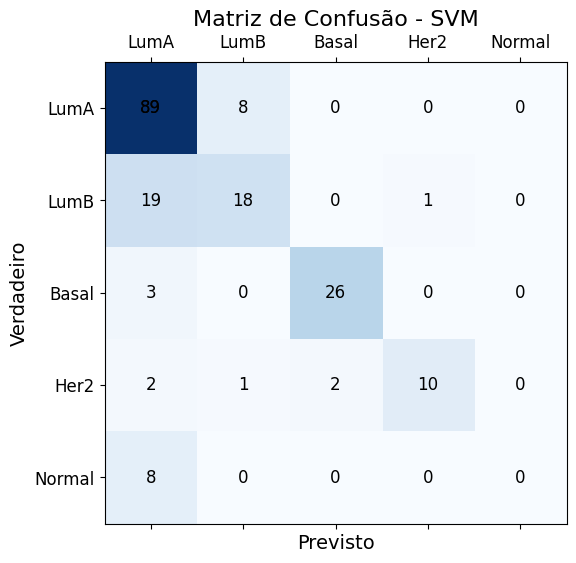

In [8]:
# Treinar e avaliar o modelo SVM com os melhores parâmetros
best_model_svm = SVC(C=best_params_svm['svc_c'], kernel=best_params_svm['svc_kernel'], random_state=42)
best_model_svm.fit(X_train, y_train)
svm_predictions_train = best_model_svm.predict(X_train)
svm_predictions_test = best_model_svm.predict(X_test)

# Avaliação SVM
svm_accuracy_train = accuracy_score(y_train, svm_predictions_train)
svm_accuracy_test = accuracy_score(y_test, svm_predictions_test)
svm_report = classification_report(y_test, svm_predictions_test, zero_division=1)

# Resultados
print(f'SVM - Acurácia (Treinamento): {svm_accuracy_train}')
print(f'SVM - Acurácia (Teste): {svm_accuracy_test}')
print(f'Acurácia média na validação cruzada: {cross_val_score(best_model_svm, X_train, y_train, cv=10).mean()}')
print(f'\nClassification Report (SVM):\n{svm_report}')

# Matriz de Confusão SVM
confusion_svm = confusion_matrix(y_test, svm_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion_svm, cmap='Blues')
def add_text(x, y, val):
    plt.text(x, y, str(val), va='center', ha='center', color='black', fontsize=12)
add_text_vectorized = np.vectorize(add_text)
add_text_vectorized(*np.meshgrid(range(len(unique_types)), range(len(unique_types))), confusion_svm)
plt.title('Matriz de Confusão - SVM', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(unique_types)), unique_types, fontsize=12)
plt.yticks(range(len(unique_types)), unique_types, fontsize=12)
plt.show()

Random Forest - Acurácia (Treinamento): 0.93048128342246
Random Forest - Acurácia (Teste): 0.7058823529411765
Acurácia média na validação cruzada: 0.72990990990991

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        97
           1       0.52      0.45      0.48        38
           2       0.79      0.90      0.84        29
           3       1.00      0.07      0.12        15
           4       1.00      0.00      0.00         8

    accuracy                           0.71       187
   macro avg       0.81      0.46      0.45       187
weighted avg       0.73      0.71      0.66       187



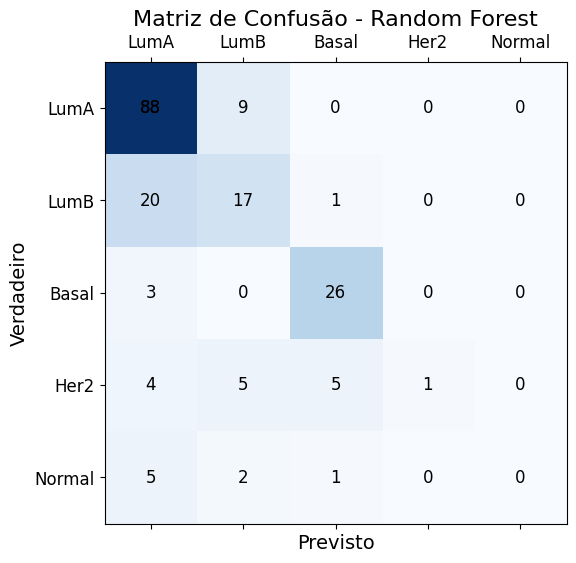

In [9]:
# Treinar e avaliar o modelo Random Forest com os melhores parâmetros
best_model_rf = RandomForestClassifier(
    n_estimators=best_params_rf['rf_n_estimators'],
    max_depth=best_params_rf['rf_max_depth'],
    min_samples_split=best_params_rf['rf_min_samples_split'],
    random_state=42
)
best_model_rf.fit(X_train, y_train)
rf_predictions_train = best_model_rf.predict(X_train)
rf_predictions_test = best_model_rf.predict(X_test)

# Avaliação Random Forest
rf_accuracy_train = accuracy_score(y_train, rf_predictions_train)
rf_accuracy_test = accuracy_score(y_test, rf_predictions_test)
rf_report = classification_report(y_test, rf_predictions_test, zero_division=1)

print(f'Random Forest - Acurácia (Treinamento): {rf_accuracy_train}')
print(f'Random Forest - Acurácia (Teste): {rf_accuracy_test}')
print(f'Acurácia média na validação cruzada: {cross_val_score(best_model_rf, X_train, y_train, cv=10).mean()}')
print(f'\nClassification Report (Random Forest):\n{rf_report}')

# Matriz de Confusão Random Forest
confusion_rf = confusion_matrix(y_test, rf_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion_rf, cmap='Blues')
add_text_vectorized(*np.meshgrid(range(len(unique_types)), range(len(unique_types))), confusion_rf)
plt.title('Matriz de Confusão - Random Forest', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(unique_types)), unique_types, fontsize=12)
plt.yticks(range(len(unique_types)), unique_types, fontsize=12)
plt.show()

c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Regressão Logística - Acurácia (Treinamento): 0.8288770053475936
Regressão Logística - Acurácia (Teste): 0.7807486631016043
Acurácia média na validação cruzada: 0.7901261261261261

Classification Report (Regressão Logística):
              precision    recall  f1-score   support

           0       0.75      0.94      0.83        97
           1       0.73      0.50      0.59        38
           2       0.90      0.93      0.92        29
           3       1.00      0.60      0.75        15
           4       0.00      0.00      0.00         8

    accuracy                           0.78       187
   macro avg       0.68      0.59      0.62       187
weighted avg       0.76      0.78      0.75       187



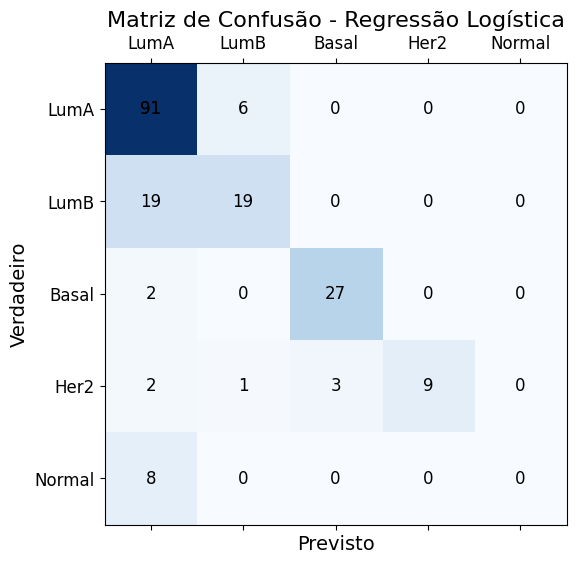

In [10]:
# Treinar e avaliar o modelo Regressão Logística com os melhores parâmetros
best_model_lr = LogisticRegression(
    C=best_params_lr['lr_c'],
    solver=best_params_lr['lr_solver'],
    max_iter=10000,
    random_state=42
)
best_model_lr.fit(X_train, y_train)
lr_predictions_train = best_model_lr.predict(X_train)
lr_predictions_test = best_model_lr.predict(X_test)

# Avaliação Regressão Logística
lr_accuracy_train = accuracy_score(y_train, lr_predictions_train)
lr_accuracy_test = accuracy_score(y_test, lr_predictions_test)
lr_report = classification_report(y_test, lr_predictions_test)
print(f'Regressão Logística - Acurácia (Treinamento): {lr_accuracy_train}')
print(f'Regressão Logística - Acurácia (Teste): {lr_accuracy_test}')
print(f'Acurácia média na validação cruzada: {cross_val_score(best_model_lr, X_train, y_train, cv=10).mean()}')
print(f'\nClassification Report (Regressão Logística):\n{lr_report}')

# Matriz de Confusão Regressão Logística
confusion_lr = confusion_matrix(y_test, lr_predictions_test)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(confusion_lr, cmap='Blues')
add_text_vectorized(*np.meshgrid(range(len(unique_types)), range(len(unique_types))), confusion_lr)
plt.title('Matriz de Confusão - Regressão Logística', fontsize=16)
plt.xlabel('Previsto', fontsize=14)
plt.ylabel('Verdadeiro', fontsize=14)
plt.xticks(range(len(unique_types)), unique_types, fontsize=12)
plt.yticks(range(len(unique_types)), unique_types, fontsize=12)
plt.show()

In [11]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SpatialDropout1D, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:

# Função objetivo para otimização do MLP
def objective_mlp(trial):
    # Hiperparâmetros para MLP
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (100, 50), (50, 25)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'logistic'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 1e-4, 1e-1)
    
    # Criar e treinar o modelo
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation,
                          solver=solver, alpha=alpha, learning_rate_init=learning_rate_init,
                          max_iter=500, random_state=42)
    
    # Validação cruzada
    score = cross_val_score(model, dim, df['Type'], cv=5, scoring='accuracy').mean()
    
    return score

# Estudar otimização com Optuna para MLP
study_mlp = optuna.create_study(direction='maximize')
study_mlp.optimize(objective_mlp, n_trials=10)

# Melhores parâmetros
best_params_mlp = study_mlp.best_params
print("Melhores parâmetros para MLP:", best_params_mlp)

# Treinamento e avaliação do MLP com melhores parâmetros
best_mlp_model = MLPClassifier(hidden_layer_sizes=best_params_mlp['hidden_layer_sizes'],
                               activation=best_params_mlp['activation'],
                               solver=best_params_mlp['solver'],
                               alpha=best_params_mlp['alpha'],
                               learning_rate_init=best_params_mlp['learning_rate_init'],
                               max_iter=500, random_state=42)
best_mlp_model.fit(X_train, y_train)
mlp_predictions_train = best_mlp_model.predict(X_train)
mlp_predictions_test = best_mlp_model.predict(X_test)

[I 2024-07-30 19:23:44,929] A new study created in memory with name: no-name-adebe1e5-29c3-4dc3-b1bc-c56853f7a514
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn

Melhores parâmetros para MLP: {'hidden_layer_sizes': (50,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.000484477002190704, 'learning_rate_init': 0.01878818827302936}


In [20]:
# Avaliação para MLP
print("\nResultados do MLP:")
print("Matriz de Confusão:\n", confusion_matrix(y_test, mlp_predictions_test))
print("Acurácia (Treinamento):", accuracy_score(y_train, mlp_predictions_train))
print("Acurácia (Teste):", accuracy_score(y_test, mlp_predictions_test))
print("Precisão (Weighted):", precision_score(y_test, mlp_predictions_test, average='weighted'))
print("Recall (Weighted):", recall_score(y_test, mlp_predictions_test, average='weighted'))
print("F1 Score (Weighted):", f1_score(y_test, mlp_predictions_test, average='weighted'))

# Acurácia média na validação cruzada
cv_mean_score = cross_val_score(best_mlp_model, X_train, y_train, cv=10, scoring='accuracy').mean()
print(f'Acurácia média na validação cruzada (MLP): {cv_mean_score:.4f}')

# Classification Report
mlp_report = classification_report(y_test, mlp_predictions_test, zero_division=1, target_names=[str(cls) for cls in unique_types])
print(f'\nClassification Report (MLP):\n{mlp_report}')


Resultados do MLP:
Matriz de Confusão:
 [[79 14  0  4  0]
 [13 23  2  0  0]
 [ 1  1 26  0  1]
 [ 0  1  3 11  0]
 [ 4  0  0  0  4]]
Acurácia (Treinamento): 1.0
Acurácia (Teste): 0.7647058823529411
Precisão (Weighted): 0.7654162409380626
Recall (Weighted): 0.7647058823529411
F1 Score (Weighted): 0.7634102083299944
Acurácia média na validação cruzada (MLP): 0.7902

Classification Report (MLP):
              precision    recall  f1-score   support

        LumA       0.81      0.81      0.81        97
        LumB       0.59      0.61      0.60        38
       Basal       0.84      0.90      0.87        29
        Her2       0.73      0.73      0.73        15
      Normal       0.80      0.50      0.62         8

    accuracy                           0.76       187
   macro avg       0.76      0.71      0.73       187
weighted avg       0.77      0.76      0.76       187



In [51]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import numpy as np

# Definir número de classes
num_classes = len(unique_types)  # Certifique-se de que unique_types esteja definido corretamente

# Função para criar o modelo CNN
def create_cnn_model(filters=32, kernel_size=3, pool_size=2, dense_units=64, dropout_rate=0.5):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=pool_size),
        Conv1D(filters=filters * 2, kernel_size=kernel_size, activation='relu'),
        MaxPooling1D(pool_size=pool_size),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Função objetivo para otimização do CNN
def objective_cnn(trial):
    # Hiperparâmetros para CNN
    filters = trial.suggest_int('filters', 16, 64)
    kernel_size = trial.suggest_int('kernel_size', 2, 5)
    pool_size = trial.suggest_int('pool_size', 2, 4)
    dense_units = trial.suggest_int('dense_units', 32, 128)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)

    # Criação do modelo
    model = create_cnn_model(filters=filters,
                             kernel_size=kernel_size,
                             pool_size=pool_size,
                             dense_units=dense_units,
                             dropout_rate=dropout_rate)

    # Validação cruzada
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = []
    for train_index, val_index in kf.split(X_train):
        X_fold_train, X_fold_val = X_train[train_index], X_train[val_index]
        y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_fold_train, y_fold_train, epochs=10, batch_size=32, verbose=0)
        val_loss, val_accuracy = model.evaluate(X_fold_val, y_fold_val, verbose=0)
        cv_scores.append(val_accuracy)
    
    # Média da acurácia de validação cruzada
    mean_cv_accuracy = np.mean(cv_scores)

    return mean_cv_accuracy

# Estudar otimização com Optuna para CNN
study_cnn = optuna.create_study(direction='maximize')
study_cnn.optimize(objective_cnn, n_trials=10)

# Melhores parâmetros
best_params_cnn = study_cnn.best_params
print("Melhores parâmetros para CNN:", best_params_cnn)

# Treinamento e avaliação do CNN com melhores parâmetros
best_cnn_model = create_cnn_model(filters=best_params_cnn['filters'],
                                  kernel_size=best_params_cnn['kernel_size'],
                                  pool_size=best_params_cnn['pool_size'],
                                  dense_units=best_params_cnn['dense_units'],
                                  dropout_rate=best_params_cnn['dropout_rate'])

# Treinamento do modelo
history = best_cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Avaliação da CNN no conjunto de teste
cnn_loss, cnn_accuracy = best_cnn_model.evaluate(X_test, y_test)

# Predições da CNN no conjunto de teste
cnn_predictions = best_cnn_model.predict(X_test)
cnn_predictions_classes = np.argmax(cnn_predictions, axis=1)

# Classification report da CNN
cnn_report = classification_report(y_test, cnn_predictions_classes, target_names=[str(cls) for cls in unique_types], zero_division=1, digits=2)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, cnn_predictions_classes)

# Acurácia de treinamento
train_accuracy = history.history['accuracy'][-1]

# Acurácia da validação cruzada (a média das acurácias obtidas durante a otimização)
cv_mean_accuracy = study_cnn.best_value


[I 2024-07-30 19:53:43,608] A new study created in memory with name: no-name-e75d208d-6722-48fe-be6e-7640e6f730ec
C:\Users\ana_v\AppData\Local\Temp\ipykernel_32472\1330266180.py:36: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.2, 0.5)
c:\Users\ana_v\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2024-07-30 19:53:56,263] Trial 0 finished with value: 0.9159910559654236 and parameters: {'filters': 46, 'kernel_size': 4, 'pool_size': 2, 'dense_units': 120, 'dropout_rate': 0.25817534

Melhores parâmetros para CNN: {'filters': 46, 'kernel_size': 4, 'pool_size': 2, 'dense_units': 120, 'dropout_rate': 0.2581753417158043}
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3619 - loss: 2.4192 - val_accuracy: 0.5187 - val_loss: 1.2701
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5773 - loss: 1.1561 - val_accuracy: 0.6043 - val_loss: 1.0507
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7273 - loss: 0.7907 - val_accuracy: 0.6417 - val_loss: 0.9186
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7925 - loss: 0.5875 - val_accuracy: 0.6684 - val_loss: 0.9466
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7987 - loss: 0.5185 - val_accuracy: 0.6203 - val_loss: 0.8847
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8632 - loss: 0.4122 - val_accuracy: 0.6417 - val_loss: 0.8864
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9024 - loss: 0.2906 - val_accuracy: 0

In [52]:
# Exibindo resultados da CNN
print(f'\nCNN - Acurácia (Treinamento): {train_accuracy:.4f}')
print(f'CNN - Acurácia (Teste): {cnn_accuracy:.4f}')
print(f'Acurácia média na validação cruzada (CNN): {cv_mean_accuracy:.4f}')
print(f'\nMatriz de Confusão (CNN):\n{conf_matrix}')
print(f'\nClassification Report (CNN):\n{cnn_report}')


CNN - Acurácia (Treinamento): 0.9532
CNN - Acurácia (Teste): 0.6631
Acurácia média na validação cruzada (CNN): 0.9160

Matriz de Confusão (CNN):
[[76 16  2  3  0]
 [19 17  1  1  0]
 [ 2  1 26  0  0]
 [ 4  2  4  5  0]
 [ 7  1  0  0  0]]

Classification Report (CNN):
              precision    recall  f1-score   support

        LumA       0.70      0.78      0.74        97
        LumB       0.46      0.45      0.45        38
       Basal       0.79      0.90      0.84        29
        Her2       0.56      0.33      0.42        15
      Normal       1.00      0.00      0.00         8

    accuracy                           0.66       187
   macro avg       0.70      0.49      0.49       187
weighted avg       0.67      0.66      0.64       187

